In [161]:
import sys
import os
sys.path.append("../")
import time

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.optim as optim

from src.datasets.BankData import BankData

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, make_scorer

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import mlrose_hiive as mlrose
import numpy as np
from src.models.NeuralNetwork import NeuralNetworkClassifier
from src.models.NeuralNetwork import NeuralNetwork

from src.plots.CrossValidationFolds import CrossValidationFolds
from src.plots.ValidationCurve import ValidationCurve as ValidationCurvePlot
from src.plots.Histogram import Histogram
from src.plots.LearningCurve import LearningCurve as LearningCurvePlot
from src.plots.ClassificationReport import ClassificationReport
from src.plots.ConfusionMatrix import ConfusionMatrix
from src.plots.ScatterPlot import ScatterPlot
from src.plots.CompareFitTimes import CompareFitTimes as CompareFitTimesPlot
from src.plots.BoostingIterations import BoostingIterations as BoostingIterationsPlot
from src.plots.LearningEpochsCurve import LearningEpochsCurve as LearningEpochsCurvePlot

from src.experiments.CrossValidation import CrossValidation
from src.experiments.ValidationCurve import ValidationCurve
from src.experiments.ModelEvaluation import ModelEvaluation
from src.experiments.LearningCurve import LearningCurve
from src.experiments.BoostingIterations import BoostingIterations
from src.experiments.LearningCurveEpochs import LearningCurveEpochs
from src.experiments.CompareFitTimes import CompareFitTimes

from sklearn.model_selection import train_test_split
from sklearn.base import clone
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [159]:
plt.style.use('seaborn')
random_state=42
bank_data = BankData(random_state=random_state)

In [171]:
nn_tuned_clf = NeuralNetworkClassifier(
    n_layers=2, 
    in_features=bank_data.X_train.shape[1], 
    out_features=26, 
    epochs=10, 
    activation_fn=nn.ReLU,
    learning_rate=0.001,
    verbose=True
)

rhc_nn_clf = NeuralNetworkClassifier(
    n_layers=2, 
    in_features=bank_data.X_train.shape[1], 
    out_features=26, 
    epochs=10, 
    verbose=True,
    restarts=1,
    max_attempts=5,
    max_iters=np.inf,
    learning_rate=1.0,
    optimizer_strategy="random_hill_climb",
    activation_fn=nn.ReLU
)

sim_anl_nn_clf = NeuralNetworkClassifier(
    n_layers=2, 
    in_features=bank_data.X_train.shape[1], 
    out_features=26, 
    epochs=10, 
    verbose=True,
    decay_type='geo',
    decay=0.2, # tuned
    init_temp=0.01, # tuned
    max_attempts=3, # tuned
    max_iters=20,
    learning_rate=0.2, # tuned
    optimizer_strategy="simulated_annealing"
)

genetic_alg_nn_clf = NeuralNetworkClassifier(
    n_layers=2, 
    in_features=bank_data.X_train.shape[1], 
    out_features=26, 
    epochs=2, 
    learning_rate=0.1,
    optimizer_strategy="genetic_alg",
    pop_size=200,
    mutation_prob=0.001,
    max_attempts=10,
    max_iters=100,
    verbose=True
)

## Loss Curves

In [110]:
tuned_learning_curve_epochs = LearningCurveEpochs(
    nn_tuned_clf, 
    scoring='cross-entropy',
    n_splits=3
)
tuned_learning_curve_epochs.run(bank_data.X_train, bank_data.y_train)

Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9
Batch:  10
Batch:  11
Batch:  12
Batch:  13
Batch:  14
Batch:  15
Batch:  16
Batch:  17
Batch:  18
Batch:  19
Batch:  20
train: 3.5163603850773404
test: 3.5041229724884033
Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9
Batch:  10
Batch:  11
Batch:  12
Batch:  13
Batch:  14
Batch:  15
Batch:  16
Batch:  17
Batch:  18
Batch:  19
Batch:  20
train: 3.5051518508366177
test: 3.490610122680664
Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9
Batch:  10
Batch:  11
Batch:  12
Batch:  13
Batch:  14
Batch:  15
Batch:  16
Batch:  17
Batch:  18
Batch:  19
Batch:  20
train: 3.493490468888056
test: 3.4796969890594482
Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9
Batch:  10
Batch:  11
Batch:  12
Batch:  13
Batch:  14
Batch:  15
Batch:  16
Batch:  1

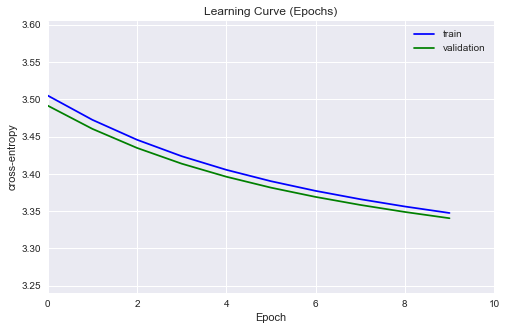

In [127]:
tuned_learning_curve_epochs_plot = LearningEpochsCurvePlot(experiment=tuned_learning_curve_epochs)
fig, ax = tuned_learning_curve_epochs_plot.plot()

In [116]:
rhc_learning_curve_epochs = LearningCurveEpochs(
    rhc_nn_clf, 
    scoring='cross-entropy',
    n_splits=3
)
rhc_learning_curve_epochs.run(bank_data.X_train, bank_data.y_train)

Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9
Batch:  10
Batch:  11
Batch:  12
Batch:  13
Batch:  14
Batch:  15
Batch:  16
Batch:  17
Batch:  18
Batch:  19
Batch:  20
train: 1.0667919530754997
test: 0.43952223658561707
Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9
Batch:  10
Batch:  11
Batch:  12
Batch:  13
Batch:  14
Batch:  15
Batch:  16
Batch:  17
Batch:  18
Batch:  19
Batch:  20
train: 0.35887562944775536
test: 0.3263264000415802
Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9
Batch:  10
Batch:  11
Batch:  12
Batch:  13
Batch:  14
Batch:  15
Batch:  16
Batch:  17
Batch:  18
Batch:  19
Batch:  20
train: 0.31219397698129925
test: 0.3168107271194458
Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9
Batch:  10
Batch:  11
Batch:  12
Batch:  13
Batch:  14
Batch:  15
Batch:  16
Batc

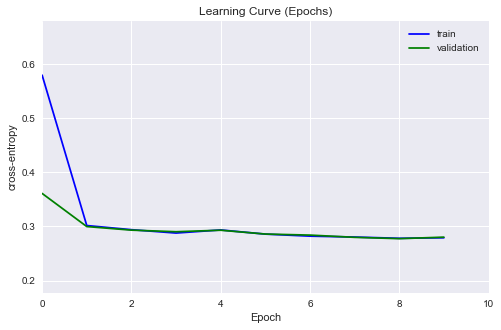

In [126]:
rhc_learning_curve_epochs_plot = LearningEpochsCurvePlot(experiment=rhc_learning_curve_epochs)
fig, ax = rhc_learning_curve_epochs_plot.plot()

In [118]:
sim_anl_learning_curve_epochs = LearningCurveEpochs(
    sim_anl_nn_clf, 
    scoring='cross-entropy',
    n_splits=3
)
sim_anl_learning_curve_epochs.run(bank_data.X_train, bank_data.y_train)

Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9
Batch:  10
Batch:  11
Batch:  12
Batch:  13
Batch:  14
Batch:  15
Batch:  16
Batch:  17
Batch:  18
Batch:  19
Batch:  20
train: 1.48711097240448
test: 0.7691230177879333
Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9
Batch:  10
Batch:  11
Batch:  12
Batch:  13
Batch:  14
Batch:  15
Batch:  16
Batch:  17
Batch:  18
Batch:  19
Batch:  20
train: 0.59420207852409
test: 0.45925650000572205
Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9
Batch:  10
Batch:  11
Batch:  12
Batch:  13
Batch:  14
Batch:  15
Batch:  16
Batch:  17
Batch:  18
Batch:  19
Batch:  20
train: 0.38022630839120775
test: 0.3285878598690033
Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9
Batch:  10
Batch:  11
Batch:  12
Batch:  13
Batch:  14
Batch:  15
Batch:  16
Batch:  1

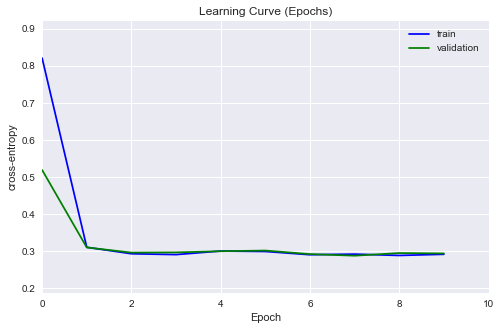

In [131]:
sim_anl_learning_curve_epochs_plot = LearningEpochsCurvePlot(experiment=sim_anl_learning_curve_epochs)
fig, ax = sim_anl_learning_curve_epochs_plot.plot()

In [121]:
ga_learning_curve_epochs = LearningCurveEpochs(
    genetic_alg_nn_clf, 
    scoring='cross-entropy',
    n_splits=2
)
ga_learning_curve_epochs.run(bank_data.X_train, bank_data.y_train)

Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9
Batch:  10
Batch:  11
Batch:  12
Batch:  13
Batch:  14
Batch:  15
train: 0.6937656737864017
test: 0.7288139462471008
Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9
Batch:  10
Batch:  11
Batch:  12
Batch:  13
Batch:  14
Batch:  15
train: 0.6952231135219336
test: 0.8449704051017761
Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9
Batch:  10
Batch:  11
Batch:  12
Batch:  13
Batch:  14
Batch:  15
train: 0.6498522534966469
test: 0.6942524909973145
Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9
Batch:  10
Batch:  11
Batch:  12
Batch:  13
Batch:  14
Batch:  15
train: 0.7029176391661167
test: 0.7262371778488159
Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9
Batch:  10
Batch:  11
Batch:  12

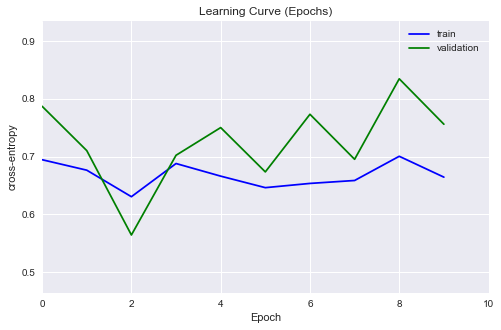

In [124]:
ga_learning_curve_epochs_plot = LearningEpochsCurvePlot(experiment=ga_learning_curve_epochs)
fig, ax = ga_learning_curve_epochs_plot.plot()

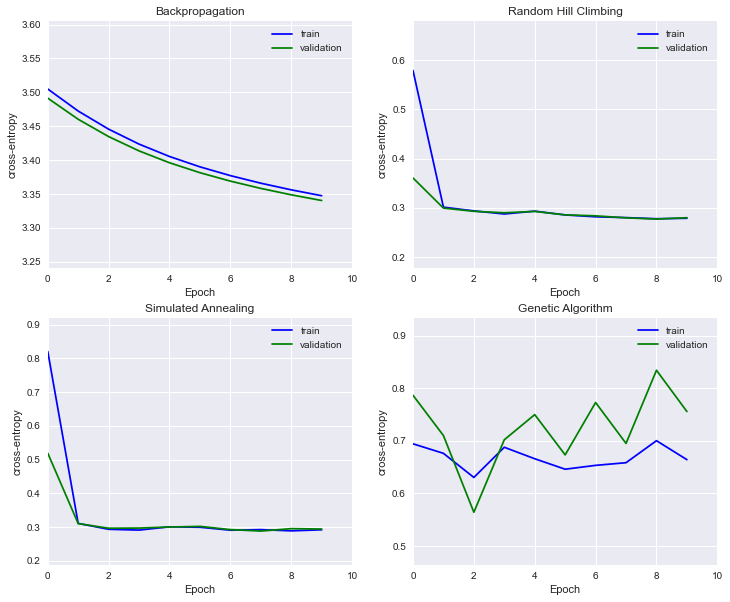

In [177]:
loss_comparison_fig, axs = plt.subplots(2, 2, figsize=(12, 10))
_, ax = tuned_learning_curve_epochs_plot.plot(ax=axs[0][0], title="Backpropagation")
_, ax = rhc_learning_curve_epochs_plot.plot(ax=axs[0][1], title="Random Hill Climbing")
_, ax = sim_anl_learning_curve_epochs_plot.plot(ax=axs[1][0], title="Simulated Annealing")
_, ax = ga_learning_curve_epochs_plot.plot(ax=axs[1][1], title="Genetic Algorithm")

In [178]:
loss_comparison_fig.savefig(
    "../out/ANN Optimization - Compare Loss Curves.png",  
    bbox_inches='tight',
    dpi=800
)

## Function Evals and Wall Clock Times

In [135]:
rhc_func_evals = clone(rhc_nn_clf)
rhc_func_evals.fit(bank_data.X_train, bank_data.y_train)
sa_func_eval = clone(sim_anl_nn_clf)
sa_func_eval.fit(bank_data.X_train, bank_data.y_train)
ga_func_evals = clone(genetic_alg_nn_clf)
ga_func_evals.fit(bank_data.X_train, bank_data.y_train)

Epoch: 0 / 4.59962010383606 seconds - 1.0109170184981437
Epoch: 1 / 6.779368877410889 seconds - 0.3501971979295054
Epoch: 2 / 9.18230390548706 seconds - 0.31114667750174
Epoch: 3 / 11.040580987930298 seconds - 0.31468005910996466
Epoch: 4 / 12.41087293624878 seconds - 0.300075912667859
Epoch: 5 / 14.21094799041748 seconds - 0.32256177356166227
Epoch: 6 / 16.11756420135498 seconds - 0.3119622392039145
Epoch: 7 / 17.769598960876465 seconds - 0.30755272123121447
Epoch: 8 / 19.1993670463562 seconds - 0.29194029204307065
Epoch: 9 / 20.73346996307373 seconds - 0.2944231071779805
Epoch: 0 / 1.6523668766021729 seconds - 2.3687193239888837
Epoch: 1 / 3.0635719299316406 seconds - 1.670655873513991
Epoch: 2 / 4.439552068710327 seconds - 0.5745553681927342
Epoch: 3 / 5.856306076049805 seconds - 0.34768835190803776
Epoch: 4 / 7.56161904335022 seconds - 0.30951981775222287
Epoch: 5 / 9.509464025497437 seconds - 0.2997175137842855
Epoch: 6 / 11.240138053894043 seconds - 0.28608759660874644
Epoch: 7 /

NeuralNetworkClassifier(epochs=10, in_features=26, learning_rate=0.2,
                        mutation_prob=0.5, optimizer_strategy='genetic_alg',
                        out_features=26, pop_size=50, verbose=True)

In [136]:
print(rhc_func_evals.epoch_mean_func_evals)
print(sa_func_eval.epoch_mean_func_evals)
print(ga_func_evals.epoch_mean_func_evals)

[40.096774193548384, 27.741935483870968, 25.258064516129032, 21.258064516129032, 16.29032258064516, 19.774193548387096, 22.35483870967742, 18.64516129032258, 16.161290322580644, 17.0]
[31.70967741935484, 27.870967741935484, 28.06451612903226, 28.387096774193548, 32.096774193548384, 33.41935483870968, 35.064516129032256, 33.67741935483871, 35.483870967741936, 36.16129032258065]
[1197.032258064516, 1076.3548387096773, 1129.7096774193549, 1175.7096774193549, 1079.8709677419354, 1253.2903225806451, 1065.225806451613, 1213.4516129032259, 1157.258064516129, 1099.741935483871]


In [137]:
func_evals_comp = CompareFuncEvalsPlot(models=[rhc_func_evals, sa_func_eval, ga_func_evals])
fig, axs = func_evals_comp.plot()

NameError: name 'CompareFuncEvalsPlot' is not defined

In [138]:
bp_fit_times = CompareFitTimes(nn_tuned_clf, name="Backprop")
bp_fit_times.run(bank_data.X_train, bank_data.y_train)

Epoch: 0 / 0.6350357532501221 seconds - 3.3408628702163696
Epoch: 1 / 1.255145788192749 seconds - 3.339998424053192
Epoch: 2 / 1.8947350978851318 seconds - 3.3391340374946594
Epoch: 3 / 2.4833409786224365 seconds - 3.3382477164268494
Epoch: 4 / 3.0756640434265137 seconds - 3.3373630046844482
Epoch: 5 / 3.6710550785064697 seconds - 3.3364760875701904
Epoch: 6 / 4.269873857498169 seconds - 3.3355897665023804
Epoch: 7 / 4.866034746170044 seconds - 3.334707498550415
Epoch: 8 / 5.458296060562134 seconds - 3.333826780319214
Epoch: 9 / 6.051893949508667 seconds - 3.3329482078552246
Epoch: 0 / 2.1009509563446045 seconds - 3.3179840824820777
Epoch: 1 / 4.038050889968872 seconds - 3.3075108528137207
Epoch: 2 / 5.96144700050354 seconds - 3.2878905859860508
Epoch: 3 / 7.896586894989014 seconds - 3.246227567846125
Epoch: 4 / 9.817439079284668 seconds - 3.180226369337602
Epoch: 5 / 11.750643014907837 seconds - 3.0964450402693315
Epoch: 6 / 13.685313701629639 seconds - 2.9996871948242188
Epoch: 7 / 1

(array([ 6.05199981, 19.4829309 , 32.82499003, 46.83424282, 60.73232007]),
 array([ 3133, 10253, 17374, 24494, 31615]))

In [139]:
rhc_fit_times = CompareFitTimes(rhc_nn_clf, name="RHC")
rhc_fit_times.run(bank_data.X_train, bank_data.y_train)

Epoch: 0 / 0.7971220016479492 seconds - 1.6315951645374298
Epoch: 1 / 1.0945160388946533 seconds - 0.8611865043640137
Epoch: 2 / 1.5633130073547363 seconds - 0.7176100611686707
Epoch: 3 / 1.9616060256958008 seconds - 0.5552868470549583
Epoch: 4 / 2.254789113998413 seconds - 0.5084431618452072
Epoch: 5 / 2.677074909210205 seconds - 0.3920547887682915
Epoch: 6 / 2.977165937423706 seconds - 0.35886557772755623
Epoch: 7 / 3.2478561401367188 seconds - 0.3402691073715687
Epoch: 8 / 3.4673080444335938 seconds - 0.327213566750288
Epoch: 9 / 3.699165105819702 seconds - 0.3136396147310734
Epoch: 0 / 1.247938632965088 seconds - 3.095951947298917
Epoch: 1 / 2.2955808639526367 seconds - 0.8230368058112535
Epoch: 2 / 3.316859722137451 seconds - 0.40010028603402054
Epoch: 3 / 4.097128868103027 seconds - 0.3078319372778589
Epoch: 4 / 4.7783167362213135 seconds - 0.2796630287034945
Epoch: 5 / 5.448117017745972 seconds - 0.27713160758668726
Epoch: 6 / 6.242578744888306 seconds - 0.2870794514363462
Epoch

(array([ 3.69923615,  8.51243591, 12.28559685, 15.31520987, 19.08797193]),
 array([ 3133, 10253, 17374, 24494, 31615]))

In [140]:
sa_fit_times = CompareFitTimes(sim_anl_nn_clf, name="SA")
sa_fit_times.run(bank_data.X_train, bank_data.y_train)

Epoch: 0 / 0.27048516273498535 seconds - 2.448179841041565
Epoch: 1 / 0.6071779727935791 seconds - 2.3146045207977295
Epoch: 2 / 0.7865691184997559 seconds - 2.034780889749527
Epoch: 3 / 1.0837819576263428 seconds - 1.8417304158210754
Epoch: 4 / 1.2809429168701172 seconds - 1.5664241015911102
Epoch: 5 / 1.4434561729431152 seconds - 1.4999094009399414
Epoch: 6 / 1.6165971755981445 seconds - 1.3476214408874512
Epoch: 7 / 2.1101720333099365 seconds - 1.1273216903209686
Epoch: 8 / 2.404798984527588 seconds - 0.7765285968780518
Epoch: 9 / 2.6814701557159424 seconds - 0.7023143172264099
Epoch: 0 / 0.8571062088012695 seconds - 1.7994509935379028
Epoch: 1 / 1.467453956604004 seconds - 1.57594143260609
Epoch: 2 / 2.015221118927002 seconds - 1.1792247187007556
Epoch: 3 / 3.0182111263275146 seconds - 0.7457217140631243
Epoch: 4 / 3.6883912086486816 seconds - 0.5564141083847393
Epoch: 5 / 4.617284059524536 seconds - 0.4579210741953416
Epoch: 6 / 5.830786228179932 seconds - 0.40716622092507104
Epoc

(array([ 2.6815598 ,  8.18772197,  9.92822313, 13.86710191, 19.27296686]),
 array([ 3133, 10253, 17374, 24494, 31615]))

In [141]:
ga_fit_times = CompareFitTimes(genetic_alg_nn_clf, name="GA")
ga_fit_times.run(bank_data.X_train, bank_data.y_train)

Epoch: 0 / 9.650935173034668 seconds - 0.6818477511405945
Epoch: 1 / 17.25978398323059 seconds - 0.7484176158905029
Epoch: 2 / 29.74936294555664 seconds - 0.6176187694072723
Epoch: 3 / 41.26711130142212 seconds - 0.6444637626409531
Epoch: 4 / 52.12049102783203 seconds - 0.6874853819608688
Epoch: 5 / 62.709750175476074 seconds - 0.6355761885643005
Epoch: 6 / 70.1677942276001 seconds - 0.7241830974817276
Epoch: 7 / 82.45496726036072 seconds - 0.6593922227621078
Epoch: 8 / 91.84738421440125 seconds - 0.6858770400285721
Epoch: 9 / 101.97146606445312 seconds - 0.7726066559553146
Epoch: 0 / 36.45946407318115 seconds - 0.6200179051269185
Epoch: 1 / 70.98212480545044 seconds - 0.7784974845972928
Epoch: 2 / 107.23057699203491 seconds - 0.8137100393121893
Epoch: 3 / 142.52935314178467 seconds - 0.7460553889924829
Epoch: 4 / 180.09636306762695 seconds - 0.7040569132024591
Epoch: 5 / 225.84724307060242 seconds - 0.7061218375509436
Epoch: 6 / 266.7473759651184 seconds - 0.7151134664362128
Epoch: 7 

(array([101.97159815, 396.01023006, 618.3471489 , 865.08183074,
        887.62599993]),
 array([ 3133, 10253, 17374, 24494, 31615]))

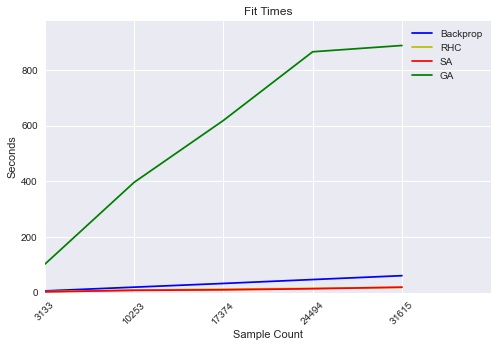

In [143]:
comp_fit_time_plot = CompareFitTimesPlot(experiments=[
    bp_fit_times, rhc_fit_times, sa_fit_times, ga_fit_times
])
fig, axs = comp_fit_time_plot.plot()

NameError: name 'func_evals_comp' is not defined

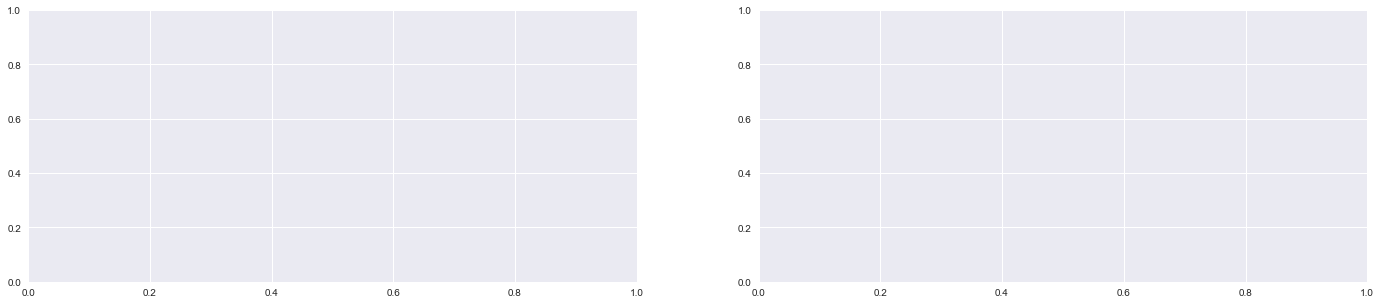

In [145]:
func_evals_time_comp, axs = plt.subplots(1, 2, figsize=(24, 5))
_, ax = func_evals_comp.plot(ax=axs[0], title="Function Evaluations per Epoch")
_, ax = comp_fit_time_plot.plot(ax=axs[1], title="Fit Times")

In [ ]:
func_evals_time_comp.savefig(
    "../out/ANN Optimization - Compare Wall Clock Time and Func Evals.png",  
    bbox_inches='tight',
    dpi=800
)

## Convergence

In [146]:
rhc_max_attempts = ValidationCurve(
    clone(rhc_nn_clf),
    'max_attempts', 
    np.arange(2, 11, 1),
    scoring='recall',
    n_splits=3,
)
rhc_max_attempts.run(bank_data.X_train, bank_data.y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch: 0 / 0.5828659534454346 seconds - 2.4633654015404836
Epoch: 1 / 1.015437126159668 seconds - 1.359822188104902
Epoch: 2 / 1.4453229904174805 seconds - 0.8560618531136286
Epoch: 3 / 1.8909790515899658 seconds - 0.6537489919435411
Epoch: 4 / 2.2601449489593506 seconds - 0.5302099755832127
Epoch: 5 / 2.607215166091919 seconds - 0.4496226750669025
Epoch: 6 / 3.102710008621216 seconds - 0.3726058772632054
Epoch: 7 / 3.4383580684661865 seconds - 0.3555901220866612
Epoch: 8 / 3.7409777641296387 seconds - 0.3505698697907584
Epoch: 9 / 4.099279165267944 seconds - 0.34241426700637456
[CV] END ....max_attempts=2;, score=(train=0.230, test=0.234) total time=   4.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


Epoch: 0 / 0.6055171489715576 seconds - 3.043652341479347
Epoch: 1 / 1.161147117614746 seconds - 1.9559499593008132
Epoch: 2 / 1.7444541454315186 seconds - 0.8927339315414429
Epoch: 3 / 2.1743640899658203 seconds - 0.5029152518226987
Epoch: 4 / 2.688894033432007 seconds - 0.3946846439724877
Epoch: 5 / 3.1699540615081787 seconds - 0.3560481667518616
Epoch: 6 / 3.592766046524048 seconds - 0.34141142879213604
Epoch: 7 / 4.054225206375122 seconds - 0.326885108436857
Epoch: 8 / 4.630497217178345 seconds - 0.3137720170475188
Epoch: 9 / 5.042285203933716 seconds - 0.30543931892939974
[CV] END ....max_attempts=3;, score=(train=0.257, test=0.282) total time=   5.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.2s remaining:    0.0s


Epoch: 0 / 1.0507466793060303 seconds - 1.4951083660125732
Epoch: 1 / 2.2080078125 seconds - 0.4477285203479585
Epoch: 2 / 2.9449846744537354 seconds - 0.39446216963586356
Epoch: 3 / 3.7137808799743652 seconds - 0.36752944900876
Epoch: 4 / 4.392033815383911 seconds - 0.33639062302453177
Epoch: 5 / 5.086004972457886 seconds - 0.31491124346142724
Epoch: 6 / 5.730954885482788 seconds - 0.30444967604818796
Epoch: 7 / 6.320019960403442 seconds - 0.30198309535071965
Epoch: 8 / 6.852874994277954 seconds - 0.2952661414941152
Epoch: 9 / 7.620906829833984 seconds - 0.28930867711702984
[CV] END ....max_attempts=4;, score=(train=0.273, test=0.284) total time=   7.6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.8s remaining:    0.0s


Epoch: 0 / 1.7042958736419678 seconds - 0.9344297576518286
Epoch: 1 / 3.1982157230377197 seconds - 0.35545667438280015
Epoch: 2 / 4.1327338218688965 seconds - 0.3329770536649795
Epoch: 3 / 4.82201886177063 seconds - 0.3264760445980799
Epoch: 4 / 5.562572002410889 seconds - 0.320174929641542
Epoch: 5 / 6.298726797103882 seconds - 0.31384140962646123
Epoch: 6 / 6.945972919464111 seconds - 0.31001685772623333
Epoch: 7 / 7.829286813735962 seconds - 0.30904310799780343
Epoch: 8 / 8.579561948776245 seconds - 0.3049200830005464
Epoch: 9 / 9.325909852981567 seconds - 0.30308577560243155
[CV] END ....max_attempts=5;, score=(train=0.286, test=0.293) total time=   9.3s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   26.2s remaining:    0.0s


Epoch: 0 / 2.487035036087036 seconds - 0.9600139842146919
Epoch: 1 / 3.9378318786621094 seconds - 0.32750257565861657
Epoch: 2 / 5.1397950649261475 seconds - 0.3033605530148461
Epoch: 3 / 6.29760217666626 seconds - 0.29337592352004277
Epoch: 4 / 7.274885892868042 seconds - 0.28793518741925556
Epoch: 5 / 8.170523881912231 seconds - 0.28664128269468037
Epoch: 6 / 8.915991067886353 seconds - 0.28656625960554394
Epoch: 7 / 9.718739032745361 seconds - 0.2815763240768796
Epoch: 8 / 10.396244049072266 seconds - 0.2861506726060595
Epoch: 9 / 11.183278799057007 seconds - 0.29022600395338877
[CV] END ....max_attempts=6;, score=(train=0.158, test=0.189) total time=  11.2s
Epoch: 0 / 2.7888431549072266 seconds - 0.6429224283922286
Epoch: 1 / 4.825342893600464 seconds - 0.2897716966413316
Epoch: 2 / 6.140403985977173 seconds - 0.2798045405319759
Epoch: 3 / 7.383615970611572 seconds - 0.27717125486759914
Epoch: 4 / 8.392493963241577 seconds - 0.2794178681714194
Epoch: 5 / 9.350284814834595 seconds -

Epoch: 3 / 9.70864987373352 seconds - 0.2943283801987058
Epoch: 4 / 11.179853916168213 seconds - 0.2923472693988255
Epoch: 5 / 12.472149848937988 seconds - 0.28942782680193585
Epoch: 6 / 13.623157978057861 seconds - 0.2955178249449957
Epoch: 7 / 14.650803804397583 seconds - 0.28470079104105633
Epoch: 8 / 15.640005111694336 seconds - 0.2859735744340079
Epoch: 9 / 16.806124925613403 seconds - 0.27703059429214116
[CV] END ....max_attempts=9;, score=(train=0.220, test=0.211) total time=  16.8s
Epoch: 0 / 4.550853967666626 seconds - 0.4067086520649138
Epoch: 1 / 6.799392938613892 seconds - 0.30033941637902034
Epoch: 2 / 8.56818699836731 seconds - 0.29824169051079524
Epoch: 3 / 10.092098951339722 seconds - 0.2935705525534494
Epoch: 4 / 11.610346794128418 seconds - 0.29829212597438265
Epoch: 5 / 13.539000988006592 seconds - 0.2960708410966964
Epoch: 6 / 15.061762809753418 seconds - 0.29921460435504005
Epoch: 7 / 16.317629098892212 seconds - 0.29717907025700524
Epoch: 8 / 17.5655357837677 seco

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  5.2min finished


True

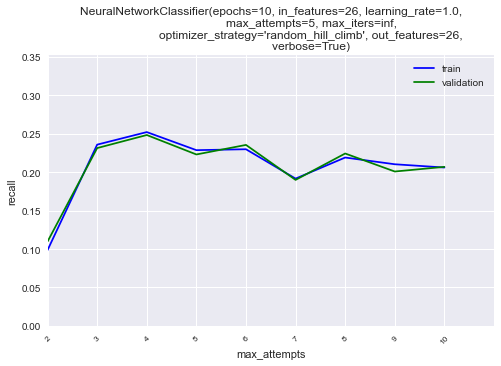

In [152]:
rhc_max_attempts_plot = ValidationCurvePlot(experiment=rhc_max_attempts)
fig, ax = rhc_max_attempts_plot.plot()

In [148]:
sa_learning_rate = ValidationCurve(
    clone(sim_anl_nn_clf),
    'learning_rate', 
    [0.05, 0.1, 0.15, 0.2, 0.25],
    scoring='recall',
    n_splits=3,
)
sa_learning_rate.run(bank_data.X_train, bank_data.y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch: 0 / 0.7101030349731445 seconds - 2.4507180963243758
Epoch: 1 / 1.3881020545959473 seconds - 2.090779769988287
Epoch: 2 / 2.0198581218719482 seconds - 1.5564936853590465
Epoch: 3 / 2.66656494140625 seconds - 1.116509993871053
Epoch: 4 / 3.4714548587799072 seconds - 0.7623113251867748
Epoch: 5 / 4.29437518119812 seconds - 0.5831599051044101
Epoch: 6 / 5.059177875518799 seconds - 0.5035864512125651
Epoch: 7 / 6.017904043197632 seconds - 0.45328489655540105
Epoch: 8 / 6.79622220993042 seconds - 0.4319411785829635
Epoch: 9 / 7.643978834152222 seconds - 0.41409054540452506
[CV] END learning_rate=0.05;, score=(train=0.000, test=0.000) total time=   7.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


Epoch: 0 / 0.7624199390411377 seconds - 1.8065360500698997
Epoch: 1 / 1.4253199100494385 seconds - 1.0065780111721583
Epoch: 2 / 2.2049689292907715 seconds - 0.5805434272402809
Epoch: 3 / 2.8019659519195557 seconds - 0.4353865243139721
Epoch: 4 / 3.5615108013153076 seconds - 0.394358625014623
Epoch: 5 / 4.330057859420776 seconds - 0.36303565048036124
Epoch: 6 / 5.145730972290039 seconds - 0.3383982635679699
Epoch: 7 / 6.0230021476745605 seconds - 0.31353046212877544
Epoch: 8 / 6.924123764038086 seconds - 0.29895044508434476
Epoch: 9 / 7.698490142822266 seconds - 0.298113329069955
[CV] END .learning_rate=0.1;, score=(train=0.175, test=0.163) total time=   7.7s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.4s remaining:    0.0s


Epoch: 0 / 0.7776229381561279 seconds - 2.2795984063829695
Epoch: 1 / 1.4601151943206787 seconds - 1.3979066638719468
Epoch: 2 / 2.0454840660095215 seconds - 0.5833720437117985
Epoch: 3 / 2.698369026184082 seconds - 0.4050101992629823
Epoch: 4 / 3.6018118858337402 seconds - 0.3386084054197584
Epoch: 5 / 4.347285032272339 seconds - 0.32582752051807584
Epoch: 6 / 5.028520822525024 seconds - 0.3138152602173033
Epoch: 7 / 5.8484110832214355 seconds - 0.3016937133811769
Epoch: 8 / 6.689484119415283 seconds - 0.2978695531686147
Epoch: 9 / 7.494757175445557 seconds - 0.2954066764740717
[CV] END learning_rate=0.15;, score=(train=0.152, test=0.147) total time=   7.5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.9s remaining:    0.0s


Epoch: 0 / 0.9766249656677246 seconds - 2.289515642892747
Epoch: 1 / 1.6756958961486816 seconds - 1.0462372317200614
Epoch: 2 / 2.348781108856201 seconds - 0.41819875722839717
Epoch: 3 / 3.126126289367676 seconds - 0.3558052508603959
Epoch: 4 / 3.948179006576538 seconds - 0.3398924271265666
Epoch: 5 / 4.76480507850647 seconds - 0.3232963823136829
Epoch: 6 / 5.6532628536224365 seconds - 0.3154760996500651
Epoch: 7 / 6.466097116470337 seconds - 0.3151017881575085
Epoch: 8 / 7.316835165023804 seconds - 0.30840960286912467
Epoch: 9 / 8.105499982833862 seconds - 0.3061297351405734
[CV] END .....learning_rate=0.2;, score=(train=nan, test=nan) total time=   8.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   31.0s remaining:    0.0s


Epoch: 0 / 0.7050647735595703 seconds - 1.3467310042608351
Epoch: 1 / 1.4575779438018799 seconds - 0.5688492286772955
Epoch: 2 / 2.216312885284424 seconds - 0.3861222721281506
Epoch: 3 / 2.96749210357666 seconds - 0.32697130810646785
Epoch: 4 / 3.6459949016571045 seconds - 0.29152780913171317
Epoch: 5 / 4.24981689453125 seconds - 0.29512832845960346
Epoch: 6 / 4.9749579429626465 seconds - 0.2938242753346761
Epoch: 7 / 5.707977771759033 seconds - 0.2856214330309913
Epoch: 8 / 6.41053581237793 seconds - 0.28606950243314105
Epoch: 9 / 7.182697772979736 seconds - 0.2828098166556585
[CV] END learning_rate=0.25;, score=(train=0.212, test=0.202) total time=   7.2s
Epoch: 0 / 0.8004469871520996 seconds - 1.9107725052606492
Epoch: 1 / 1.596513032913208 seconds - 1.62507620879582
Epoch: 2 / 2.4230408668518066 seconds - 1.442693522998265
Epoch: 3 / 3.22367787361145 seconds - 1.0670440196990967
Epoch: 4 / 4.039381980895996 seconds - 0.7654977554366702
Epoch: 5 / 4.827615976333618 seconds - 0.62201

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.9min finished


True

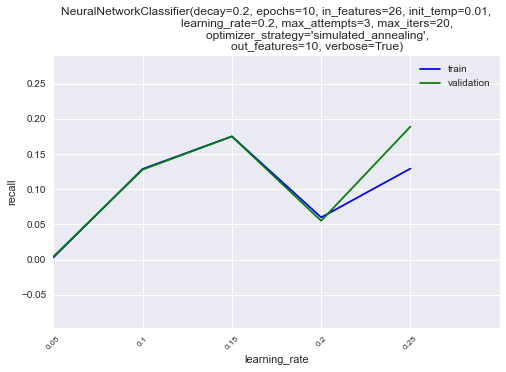

In [151]:
sa_lr_plot = ValidationCurvePlot(experiment=sa_learning_rate)
fig, ax = sa_lr_plot.plot()

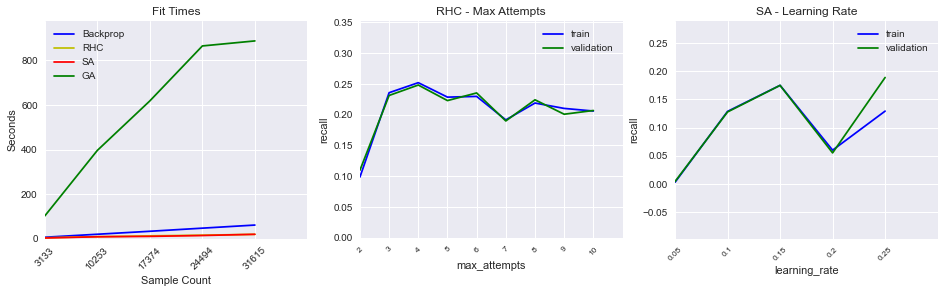

In [156]:
tuning_fig, axs = plt.subplots(1, 3, figsize=(16, 4))
_, ax = comp_fit_time_plot.plot(ax=axs[0])
_, ax = rhc_max_attempts_plot.plot(ax=axs[1], title="RHC - Max Attempts")
_, ax = sa_lr_plot.plot(ax=axs[2], title="SA - Learning Rate")

In [157]:
tuning_fig.savefig(
    "../out/ANN Optimization - Model Comparison.png",  
    bbox_inches='tight',
    dpi=800
)

## Model Evaluations

In [162]:
nn_tuned_model_eval = ModelEvaluation(nn_tuned_clf)
nn_tuned_model_eval.run(bank_data.X_train, bank_data.y_train, bank_data.X_test, bank_data.y_test)
print(nn_tuned_model_eval.model)
print(ClassificationReport(experiment=nn_tuned_model_eval).plot())

Epoch: 0 / 6.479068994522095 seconds - 3.1256165658274004
Epoch: 1 / 12.677454948425293 seconds - 2.81789445107983
Epoch: 2 / 18.8213050365448 seconds - 2.4863177960918796
Epoch: 3 / 25.04938817024231 seconds - 2.1252345461999216
Epoch: 4 / 31.072834253311157 seconds - 1.750413344752404
Epoch: 5 / 37.22273588180542 seconds - 1.407085657119751
Epoch: 6 / 43.24967098236084 seconds - 1.1373334507788382
Epoch: 7 / 49.35314607620239 seconds - 0.9462809447319277
Epoch: 8 / 55.41152811050415 seconds - 0.8143495090546147
Epoch: 9 / 61.60980415344238 seconds - 0.7209160750912081
NeuralNetworkClassifier(epochs=10, in_features=26, learning_rate=0.001,
                        out_features=26, verbose=True)
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11966
           1       0.00      0.00      0.00      1598
          23       0.00      0.00      0.00         0

    accuracy                           0.88     13564
   macro avg       0.29 

In [169]:
rhc_model_eval = ModelEvaluation(rhc_nn_clf)
rhc_model_eval.run(bank_data.X_train, bank_data.y_train, bank_data.X_test, bank_data.y_test)
print(nn_tuned_model_eval.model)

Epoch: 0 / 2.197350263595581 seconds - 1.034484225896097
Epoch: 1 / 4.127963304519653 seconds - 0.47784922103728017
Epoch: 2 / 5.592018365859985 seconds - 0.33427219333187225
Epoch: 3 / 6.972650051116943 seconds - 0.2994490285073557
Epoch: 4 / 8.205939054489136 seconds - 0.28589799327235066
Epoch: 5 / 9.051404237747192 seconds - 0.2850898278336371
Epoch: 6 / 10.07400918006897 seconds - 0.284542300047413
Epoch: 7 / 10.966265201568604 seconds - 0.2883702290634955
Epoch: 8 / 11.763437032699585 seconds - 0.28896897935098215
Epoch: 9 / 12.730633020401001 seconds - 0.2830998118846647
NeuralNetworkClassifier(epochs=10, in_features=26, learning_rate=0.001,
                        out_features=26, verbose=True)


In [170]:
print(ClassificationReport(experiment=rhc_model_eval).plot())

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.55      0.18      0.28      1598

    accuracy                           0.89     13564
   macro avg       0.73      0.58      0.61     13564
weighted avg       0.86      0.89      0.86     13564



In [165]:
sa_model_eval = ModelEvaluation(sim_anl_nn_clf)
sa_model_eval.run(bank_data.X_train, bank_data.y_train, bank_data.X_test, bank_data.y_test)
print(sa_model_eval.model)

Epoch: 0 / 1.1511638164520264 seconds - 1.366654376829824
Epoch: 1 / 2.1897478103637695 seconds - 0.5135889505186388
Epoch: 2 / 3.5453808307647705 seconds - 0.37606839210756365
Epoch: 3 / 4.518167018890381 seconds - 0.3497298167597863
Epoch: 4 / 5.549777984619141 seconds - 0.3291378838400687
Epoch: 5 / 6.762811899185181 seconds - 0.3088091717612359
Epoch: 6 / 7.828404903411865 seconds - 0.29760100764612996
Epoch: 7 / 8.905895948410034 seconds - 0.3042206658471015
Epoch: 8 / 10.199527978897095 seconds - 0.2956341072436302
Epoch: 9 / 11.196138858795166 seconds - 0.2985105014616443
NeuralNetworkClassifier(decay=0.2, epochs=10, in_features=26, init_temp=0.01,
                        learning_rate=0.2, max_attempts=3, max_iters=20,
                        optimizer_strategy='simulated_annealing',
                        out_features=10, verbose=True)


In [166]:
print(ClassificationReport(experiment=sa_model_eval).plot())

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11966
           1       0.59      0.14      0.23      1598

    accuracy                           0.89     13564
   macro avg       0.74      0.57      0.59     13564
weighted avg       0.86      0.89      0.86     13564



In [179]:
ga_model_eval = ModelEvaluation(genetic_alg_nn_clf)
ga_model_eval.run(bank_data.X_train, bank_data.y_train, bank_data.X_test, bank_data.y_test)
print(ga_model_eval.model)

Epoch: 0 / 863.6441161632538 seconds - 0.2731370094322389
Epoch: 1 / 1622.4886631965637 seconds - 0.27815767353580845
NeuralNetworkClassifier(epochs=2, in_features=26, learning_rate=0.1,
                        mutation_prob=0.001, optimizer_strategy='genetic_alg',
                        out_features=26, verbose=True)


In [180]:
print(ClassificationReport(experiment=ga_model_eval).plot())

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.53      0.21      0.30      1598

    accuracy                           0.89     13564
   macro avg       0.72      0.59      0.62     13564
weighted avg       0.86      0.89      0.86     13564

